In [22]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy.random as rnd
import csv

from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from keras import losses
from keras.layers import Activation as act

np.seterr(divide='ignore', invalid='ignore')

def cH(t,offset,d,D):
    taxis = t-offset
    taxis[taxis<0]=0
    f = np.exp(-d**2/(4*D*taxis))/np.sqrt(4*np.pi*D*taxis**3)
    f[np.isinf(f)==True]=np.max(f[np.isinf(f)==False])
    f[np.isnan(f)==True]=0
    f = np.reshape(f,[1,f.shape[0]])
    return f

def make_datasets(INDATA,INLABELS,num_samples,num_classes=2,lookback=1,features_per_sample=250):
    assert num_classes==2
    DATASET = np.zeros([num_samples-lookback,lookback,features_per_sample])
    LABELSET = np.zeros([num_samples-lookback,2])
    for sample_idx in range(lookback,num_samples):
        cLABELS = INLABELS[sample_idx]
        if int(cLABELS)==0:
            LABELSET[sample_idx-lookback,0] = 1
        elif int(cLABELS)==1:
            LABELSET[sample_idx-lookback,1] = 1
        else:
            raise Exception('Ambiguous label discovered')
        for lookback_idx in range(lookback):
            start_idx = (sample_idx-lookback_idx)*features_per_sample 
            stop_idx = (sample_idx-lookback_idx+1)*features_per_sample
            cDATA = INDATA[start_idx:stop_idx]
            DATASET[sample_idx-lookback,lookback_idx,:] = cDATA[:,0]
    return DATASET,LABELSET

def str2np(in_str):
    full_val_msg_bin = ''
    for k in list(in_str):
        in_char = k
        encoded = in_char.encode()
        enc_int = int.from_bytes(encoded,'big')
        binary_rep = bin(enc_int)[2:]
        while len(binary_rep)<8:
            binary_rep = '0'+binary_rep
        full_val_msg_bin += binary_rep
    full_val_msg_np = np.array(list(full_val_msg_bin)).astype(np.float)
    return full_val_msg_np

def np2str(binrep):
    list_out = [str(int(k)) for k in list(binrep)]
    binary_str = ''.join(list_out)
    letter_list = [binary_str[k:k+8] for k in range(0, len(binary_str), 8)]
    recovered_str = ''
    for letter_bin in letter_list:
        dec_list = int(letter_bin,2)
        recovered_str += chr(dec_list)   
    return recovered_str

Processing bit 0/2000
Processing bit 1/2000
Processing bit 2/2000
Processing bit 3/2000
Processing bit 4/2000
Processing bit 5/2000
Processing bit 6/2000
Processing bit 7/2000
Processing bit 8/2000
Processing bit 9/2000
Processing bit 10/2000
Processing bit 11/2000
Processing bit 12/2000
Processing bit 13/2000
Processing bit 14/2000
Processing bit 15/2000
Processing bit 16/2000
Processing bit 17/2000
Processing bit 18/2000
Processing bit 19/2000
Processing bit 20/2000
Processing bit 21/2000
Processing bit 22/2000
Processing bit 23/2000
Processing bit 24/2000
Processing bit 25/2000
Processing bit 26/2000
Processing bit 27/2000
Processing bit 28/2000
Processing bit 29/2000
Processing bit 30/2000
Processing bit 31/2000
Processing bit 32/2000
Processing bit 33/2000
Processing bit 34/2000
Processing bit 35/2000
Processing bit 36/2000
Processing bit 37/2000
Processing bit 38/2000
Processing bit 39/2000
Processing bit 40/2000
Processing bit 41/2000
Processing bit 42/2000
Processing bit 43/200

Processing bit 352/2000
Processing bit 353/2000
Processing bit 354/2000
Processing bit 355/2000
Processing bit 356/2000
Processing bit 357/2000
Processing bit 358/2000
Processing bit 359/2000
Processing bit 360/2000
Processing bit 361/2000
Processing bit 362/2000
Processing bit 363/2000
Processing bit 364/2000
Processing bit 365/2000
Processing bit 366/2000
Processing bit 367/2000
Processing bit 368/2000
Processing bit 369/2000
Processing bit 370/2000
Processing bit 371/2000
Processing bit 372/2000
Processing bit 373/2000
Processing bit 374/2000
Processing bit 375/2000
Processing bit 376/2000
Processing bit 377/2000
Processing bit 378/2000
Processing bit 379/2000
Processing bit 380/2000
Processing bit 381/2000
Processing bit 382/2000
Processing bit 383/2000
Processing bit 384/2000
Processing bit 385/2000
Processing bit 386/2000
Processing bit 387/2000
Processing bit 388/2000
Processing bit 389/2000
Processing bit 390/2000
Processing bit 391/2000
Processing bit 392/2000
Processing bit 3

Processing bit 699/2000
Processing bit 700/2000
Processing bit 701/2000
Processing bit 702/2000
Processing bit 703/2000
Processing bit 704/2000
Processing bit 705/2000
Processing bit 706/2000
Processing bit 707/2000
Processing bit 708/2000
Processing bit 709/2000
Processing bit 710/2000
Processing bit 711/2000
Processing bit 712/2000
Processing bit 713/2000
Processing bit 714/2000
Processing bit 715/2000
Processing bit 716/2000
Processing bit 717/2000
Processing bit 718/2000
Processing bit 719/2000
Processing bit 720/2000
Processing bit 721/2000
Processing bit 722/2000
Processing bit 723/2000
Processing bit 724/2000
Processing bit 725/2000
Processing bit 726/2000
Processing bit 727/2000
Processing bit 728/2000
Processing bit 729/2000
Processing bit 730/2000
Processing bit 731/2000
Processing bit 732/2000
Processing bit 733/2000
Processing bit 734/2000
Processing bit 735/2000
Processing bit 736/2000
Processing bit 737/2000
Processing bit 738/2000
Processing bit 739/2000
Processing bit 7

Processing bit 1040/2000
Processing bit 1041/2000
Processing bit 1042/2000
Processing bit 1043/2000
Processing bit 1044/2000
Processing bit 1045/2000
Processing bit 1046/2000
Processing bit 1047/2000
Processing bit 1048/2000
Processing bit 1049/2000
Processing bit 1050/2000
Processing bit 1051/2000
Processing bit 1052/2000
Processing bit 1053/2000
Processing bit 1054/2000
Processing bit 1055/2000
Processing bit 1056/2000
Processing bit 1057/2000
Processing bit 1058/2000
Processing bit 1059/2000
Processing bit 1060/2000
Processing bit 1061/2000
Processing bit 1062/2000
Processing bit 1063/2000
Processing bit 1064/2000
Processing bit 1065/2000
Processing bit 1066/2000
Processing bit 1067/2000
Processing bit 1068/2000
Processing bit 1069/2000
Processing bit 1070/2000
Processing bit 1071/2000
Processing bit 1072/2000
Processing bit 1073/2000
Processing bit 1074/2000
Processing bit 1075/2000
Processing bit 1076/2000
Processing bit 1077/2000
Processing bit 1078/2000
Processing bit 1079/2000


Processing bit 1377/2000
Processing bit 1378/2000
Processing bit 1379/2000
Processing bit 1380/2000
Processing bit 1381/2000
Processing bit 1382/2000
Processing bit 1383/2000
Processing bit 1384/2000
Processing bit 1385/2000
Processing bit 1386/2000
Processing bit 1387/2000
Processing bit 1388/2000
Processing bit 1389/2000
Processing bit 1390/2000
Processing bit 1391/2000
Processing bit 1392/2000
Processing bit 1393/2000
Processing bit 1394/2000
Processing bit 1395/2000
Processing bit 1396/2000
Processing bit 1397/2000
Processing bit 1398/2000
Processing bit 1399/2000
Processing bit 1400/2000
Processing bit 1401/2000
Processing bit 1402/2000
Processing bit 1403/2000
Processing bit 1404/2000
Processing bit 1405/2000
Processing bit 1406/2000
Processing bit 1407/2000
Processing bit 1408/2000
Processing bit 1409/2000
Processing bit 1410/2000
Processing bit 1411/2000
Processing bit 1412/2000
Processing bit 1413/2000
Processing bit 1414/2000
Processing bit 1415/2000
Processing bit 1416/2000


Processing bit 1707/2000
Processing bit 1708/2000
Processing bit 1709/2000
Processing bit 1710/2000
Processing bit 1711/2000
Processing bit 1712/2000
Processing bit 1713/2000
Processing bit 1714/2000
Processing bit 1715/2000
Processing bit 1716/2000
Processing bit 1717/2000
Processing bit 1718/2000
Processing bit 1719/2000
Processing bit 1720/2000
Processing bit 1721/2000
Processing bit 1722/2000
Processing bit 1723/2000
Processing bit 1724/2000
Processing bit 1725/2000
Processing bit 1726/2000
Processing bit 1727/2000
Processing bit 1728/2000
Processing bit 1729/2000
Processing bit 1730/2000
Processing bit 1731/2000
Processing bit 1732/2000
Processing bit 1733/2000
Processing bit 1734/2000
Processing bit 1735/2000
Processing bit 1736/2000
Processing bit 1737/2000
Processing bit 1738/2000
Processing bit 1739/2000
Processing bit 1740/2000
Processing bit 1741/2000
Processing bit 1742/2000
Processing bit 1743/2000
Processing bit 1744/2000
Processing bit 1745/2000
Processing bit 1746/2000


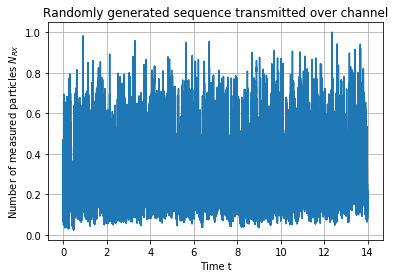

In [23]:
# Configurations

MSGLEN = 2000

TBIT = 7e-3   
SBIT = 100 

d = 2.8
D = 1000
channel_noise_std = 15
rollsteps_noise_max = 50
ampl_noise = [0.5,1.5]

# Make the data set

t = np.linspace(0,MSGLEN*TBIT,MSGLEN*SBIT)
fullRX = np.zeros([1,MSGLEN*SBIT])
msg = np.random.choice(2,MSGLEN,p=[0.5,0.5]) 
for k in range(MSGLEN):
    print('Processing bit %d/%d'%(k,MSGLEN))
    if msg[k]!=0:
        m_c = ampl_noise[0]+np.random.rand()*(ampl_noise[1]-ampl_noise[0])
        if rollsteps_noise_max!=0:
            r_c = int(np.random.randint(0,rollsteps_noise_max,1)*np.sign(np.random.randn()))
        else:
            r_c = 0
        f = cH(t,k*TBIT,d,D)
        f = np.roll(f,r_c)
        fullRX = fullRX + m_c*f
randnoise = channel_noise_std*np.random.rand(fullRX.shape[0],fullRX.shape[1])
fullRX = fullRX + randnoise 
fullRX[fullRX<0]=0
fullRX = fullRX/fullRX.max()
fullRX = np.transpose(fullRX)

msg = np.reshape(msg,[len(msg),1])
num_classes = int(np.unique(msg).shape[0])

plt.plot(t,fullRX)
plt.title('Randomly generated sequence transmitted over channel')
plt.grid()
plt.xlabel('Time t')
plt.ylabel('Number of measured particles '+'$N_{RX}$')
plt.show()

2 classes detected

1600 training data slots, 160000 training samples
400 testing data slots, 40000 testing samples

Training data shape: (1596, 4, 100)
Training labels shape: (1596, 2)
Test data shape: (396, 4, 100)
Test labels shape: (396, 2)
Visualization of training data and attached label at index 2:


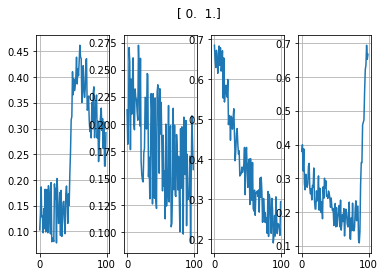

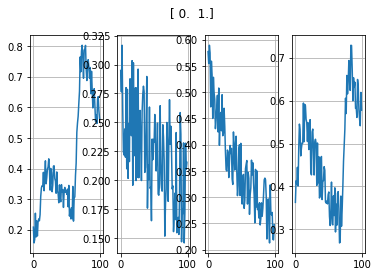

In [24]:
lookback = 4
train_data_pctg = 4/5

TR_DATA = fullRX[:(int(msg.shape[0]*train_data_pctg)*SBIT),:]
TR_LABELS = msg[:int(msg.shape[0]*train_data_pctg),:]
TE_DATA = fullRX[(int(msg.shape[0]*train_data_pctg)*SBIT):,:]
TE_LABELS = msg[int(msg.shape[0]*train_data_pctg):,:]

print('%d classes detected'%(num_classes))
print('\n%d training data slots, %d training samples'%(TR_LABELS.shape[0],TR_DATA.shape[0]))
print('%d testing data slots, %d testing samples'%(TE_LABELS.shape[0],TE_DATA.shape[0]))

tr_dataset,tr_labelset = make_datasets(TR_DATA,TR_LABELS,TR_LABELS.shape[0],lookback=lookback,features_per_sample=SBIT)
te_dataset,te_labelset = make_datasets(TE_DATA,TE_LABELS,TE_LABELS.shape[0],lookback=lookback,features_per_sample=SBIT)

print('\nTraining data shape: '+str(tr_dataset.shape))
print('Training labels shape: '+str(tr_labelset.shape))
print('Test data shape: '+str(te_dataset.shape))
print('Test labels shape: '+str(te_labelset.shape))

# Visualize the data
IDX = 2

print('Visualization of training data and attached label at index %d:'%(IDX))
if lookback>1:
    fig,axes = plt.subplots(1,int(lookback))
    
    for k in range(lookback):
        axes[k].plot(tr_dataset[IDX,k,:])
        axes[k].grid()
    plt.suptitle(str(tr_labelset[IDX,:]))
    plt.show()

    fig,axes = plt.subplots(1,int(lookback))
    for k in range(lookback):
        axes[k].plot(te_dataset[IDX,k,:])
        axes[k].grid()
    plt.suptitle(str(te_labelset[IDX,:]))
    plt.show()
else:
    plt.plot(tr_dataset[IDX,0,:])
    plt.title(str(tr_labelset[IDX,:]))
    plt.grid()
    plt.show()
    
    plt.plot(te_dataset[IDX,0,:])
    plt.title(str(te_labelset[IDX,:]))
    plt.grid()
    plt.show()

In [13]:
hidden_layer_size = 10

model = Sequential()

model.add(LSTM(hidden_layer_size,activation='tanh',recurrent_activation='hard_sigmoid',input_shape=(lookback,SBIT),kernel_initializer='normal',bias_initializer='normal',return_sequences=True))
model.add(LSTM(hidden_layer_size,activation='tanh',recurrent_activation='hard_sigmoid',input_shape=(lookback,hidden_layer_size),kernel_initializer='normal',bias_initializer='normal',return_sequences=True))
model.add(LSTM(hidden_layer_size,activation='tanh',recurrent_activation='hard_sigmoid',input_shape=(lookback,hidden_layer_size),kernel_initializer='normal',bias_initializer='normal'))
model.add(Dropout(0))
model.add(Dense(num_classes,kernel_initializer='normal',bias_initializer='normal',activation='softmax'))

opt = optimizers.Adam(lr=0.01)
model.compile(loss=losses.binary_crossentropy,optimizer=opt)
model.fit(tr_dataset,tr_labelset,epochs=150,batch_size=5,verbose=1,validation_split=0.2)

Train on 1276 samples, validate on 320 samples
Epoch 1/150
1276/1276 [==============================] - 13s 10ms/step - loss: 0.6951 - val_loss: 0.6944
Epoch 2/150
1276/1276 [==============================] - 4s 3ms/step - loss: 0.6793 - val_loss: 0.6682
Epoch 3/150
1276/1276 [==============================] - 4s 3ms/step - loss: 0.6680 - val_loss: 0.6561
Epoch 4/150
1276/1276 [==============================] - 5s 4ms/step - loss: 0.5799 - val_loss: 0.3665
Epoch 5/150
1276/1276 [==============================] - 6s 4ms/step - loss: 0.3478 - val_loss: 0.2669
Epoch 6/150
1276/1276 [==============================] - 8s 6ms/step - loss: 0.3028 - val_loss: 0.3107
Epoch 7/150
1276/1276 [==============================] - 7s 5ms/step - loss: 0.2570 - val_loss: 0.2307
Epoch 8/150
1276/1276 [==============================] - 6s 5ms/step - loss: 0.2486 - val_loss: 0.3200
Epoch 9/150
1276/1276 [==============================] - 6s 4ms/step - loss: 0.2634 - val_loss: 0.2189
Epoch 10/150
1276/1276 [

In [ ]:
# Test set performance
num_tests = -1

verbose = False
if num_tests<0:
    num_tests = te_dataset.shape[0]

if num_tests>te_dataset.shape[0]:
    raise Exception('Data dimensions mismatch')

print('Testing model on %d test set instances...\n'%(num_tests))
idx_array = rnd.randint(0,te_dataset.shape[0],num_tests)

number_misclfd = 0
avg_uncertainty = 0

for k in range(num_tests):
    my_idx = idx_array[k]
    in_data = np.reshape(te_dataset[my_idx,:,:],[1,lookback,SBIT])
    out_label = np.reshape(te_labelset[my_idx,:],[1,2])
    
    if verbose:
        plt.plot(in_data[0,0,:])
        plt.title(out_label[0,:])
        plt.show()
    
    pred = model.predict(in_data)
    thresholded = np.round(pred)
    if verbose:
        print('Model predicts: ', pred, ', thresholding yields: ', thresholded)
    
    uncertainty = 0.5*np.sum(np.abs(out_label-pred))
    if verbose:
        print(uncertainty)
    
    avg_uncertainty = avg_uncertainty + uncertainty
    if np.sum(out_label-thresholded[0,:])!=0:
        number_misclfd = number_misclfd + 1

avg_uncertainty = avg_uncertainty/num_tests
    
if verbose:
    print('\n\n\n')
print('Final stats:\n\nTotal number of mis-classified test instances: %d'%(number_misclfd))
print('Average uncertainty: %.2f percent\n'%(avg_uncertainty*100))
print('\nSome more stats:')

# One test transmission
TEST_IDX = 50
print('\nSelected instance %d for visualization of reconstruction process...'%(TEST_IDX))

test_batch_d = te_dataset[TEST_IDX,:,:]
test_batch_l = te_labelset[TEST_IDX,:]

print('Shape: '+str(test_batch_d.shape))
print('Data looks as follows (blue is what should be reconstructed, other colors show lookback):')

plt.plot(test_batch_d.transpose())
plt.title(str(test_batch_l))
plt.grid()
plt.show()

nn_output = model.predict(np.reshape(test_batch_d,[1,test_batch_d.shape[0],test_batch_d.shape[1]]))
test_pred = np.abs(np.round(nn_output))
print('Raw output: %s --> After thresholding: %s'%(str(nn_output),str(test_pred)))

# Missed classifications on test set
raw_prediction = model.predict(te_dataset)
testset_predictions = np.abs(np.round(raw_prediction))

print('\nTotal number of misclassifications on test set:')
print(np.sum(testset_predictions-te_labelset))

# Number of testing data
vec_len = 100

# Original data
sorted_data = te_dataset[0:vec_len,:,:]
sorted_labels = te_labelset[0:vec_len,:]

# Shuffle data
unsorted_data = np.zeros([vec_len,lookback,SBIT])
unsorted_labels = np.zeros([vec_len,num_classes])
index_array = rnd.randint(vec_len,te_dataset.shape[0],[vec_len,lookback])
for k in range(index_array.shape[0]):
    unsorted_labels[k,:]=te_labelset[index_array[k,0],:]
    for kk in range(lookback):
        unsorted_data[k,kk,:]=te_dataset[index_array[k,kk],0,:]

# Test output
IDX = 0

print('\nShape of test data, unshuffled and shuffled:')
print(sorted_data.shape)
print(unsorted_data.shape)
print('\nData at index %d'%(IDX))

plt.plot(unsorted_data[IDX,:,:].transpose())
plt.title(str(unsorted_labels[IDX,:]))
plt.grid()
plt.show()

# Predict sorted and unsorted data
raw_prediction_sorted = model.predict(sorted_data)
raw_prediction_unsorted = model.predict(unsorted_data)

pred_labels_sorted = np.abs(np.round(raw_prediction_sorted))
pred_labels_unsorted = np.abs(np.round(raw_prediction_unsorted))

print('\nNumber of misclassifications in sorted data (should outperform unsorted data in LSTM):')
print(np.sum(sorted_labels-pred_labels_sorted))
print('\nNumber of misclassifications in unsorted data (should perform worse):')
print(np.sum(pred_labels_unsorted-pred_labels_unsorted))

# Output raw LSTM response
print('\nRaw predicitons before selecting maximum in sorted and unsorted data for first ten inputs:')
print(raw_prediction_sorted[0:10,:])
print(raw_prediction_unsorted[0:10,:])

# Making a test transmission
instr = 'This land is your land, this land is my land, from California to the New York Island'

outbin = str2np(instr)
outbin = np.append(outbin,np.zeros(80))

val_MSGLEN = outbin.shape[0]

val_t = np.linspace(0,val_MSGLEN*TBIT,val_MSGLEN*SBIT)
val_RX = np.zeros([1,val_MSGLEN*SBIT])
val_msg = outbin
for k in range(val_MSGLEN):
    if val_msg[k]!=0:
        val_m_c = ampl_noise[0]+np.random.rand()*(ampl_noise[1]-ampl_noise[0])
        if rollsteps_noise_max!=0:
            val_r_c = int(np.random.randint(0,rollsteps_noise_max,1)*np.sign(np.random.randn()))
        else:
            val_r_c = 0
        val_f = cH(val_t,k*TBIT,d,D)
        val_f = np.roll(val_f,val_r_c)
        val_RX = val_RX + val_m_c*val_f
val_randnoise = channel_noise_std*np.random.rand(val_RX.shape[0],val_RX.shape[1])
val_RX = val_RX + val_randnoise 
val_RX[val_RX<0]=0
val_RX = val_RX/val_RX.max()
val_RX = np.transpose(val_RX)

val_msg = np.reshape(val_msg,[len(val_msg),1])

num_bits = int(val_RX.shape[0]/SBIT)
valdata = np.zeros(shape=[num_bits,lookback,SBIT])

for k in range(num_bits):
    for kk in range(lookback):
        if k-kk<0:
            thisslot = np.zeros(shape=[SBIT])
        else:
            thisslot = val_RX[(k-kk)*SBIT:(k-kk+1)*SBIT,0]
        valdata[k,kk,:] = thisslot[:]

val_pred = model.predict(valdata)
reco = np.abs(np.round(val_pred))

recovered_np = np.array([])
for k in range(reco.shape[0]):
    recovered_np = np.append(recovered_np,np.argmax(reco[k,:])) 
    
recovered_str = np2str(recovered_np)

# Output results
print('\nInput string:\n\n\t'+instr+'\n\nyields the following channel response:')
plt.plot(val_t,val_RX)
plt.xlabel('Time t')
plt.ylabel('Number of measured particles '+'$N_{RX}$')
plt.grid()
plt.show()
print('Recovered string:\n\n\t'+recovered_str+'\n')

# Measure BER
ber = np.sum(np.abs(outbin-recovered_np))/outbin.shape[0]

print('\n\n')
print('Bit Error Rate BER=%f'%(ber))

Testing model on 396 test set instances...



```css
Performance in reconstruction of a test phrase
```

Specifications: 100 samples taken per bit, $T_{bit}$=0.007 seconds

2 LSTM layers, 20 neurons per layer, MSE loss

|lookback| Reconstructed phrase |BER|
|---|---|---|
|1| Tl)s laþd i{ {oõû0,and. thi»0l!~d as0my laæd< froo Cñliæ.z.ia \o0the Ne. ]ïzk M{ìand |0.055851|
|2| Ôhis lqnd is yo}z land, this land is mù lanä, dro} Califorîia to the New Yovk Islaîd |0.014628|
|3| Ôhis land is your nand, this land is my land, vvom California to the Î%w York Island |0.007979|
|4| T((0,'nds8/ux ~'gd.S()qland hq my d!.d.brkm.adi$oð&i  4o phe New Ioro 	slnd |0.085106|
|5| Vhkw laod is your lqnf, this lant ys°my lánd, from Calyæornia t. txe Nuw0y.ro Is~aîf |0.034574|
|7| ,i{ nqot i{ }ÿýú lqo\.\\}ÿð\yÿ\0yÿ .ý ~qÿv. vs.ÿðCñ~}÷.ÿ.ýñ \o°w\u°Omÿ ].ÿ.ðI{þqÿæ|0.172872|


```css
Performance in reconstruction of a test phrase
```

Specifications: 100 samples taken per bit, $T_{bit}$=0.007 seconds

4 LSTM layers, 10 neurons per layer, binary-cross-entropy loss

|lookback| Reconstructed phrase |BER|
|---|---|---|
|1| Th){ Iand as your laN',thy; land is oy lanS,0fro) C.lifor~ia 0o thg Nuw Y/roI3Lqnd |0.035904|
|2| This land is your lant, this land is my land, from Californya to the New York .slajä |0.007979|
|3| This land is your land, this land is my lan$, from California to the New York Island |0.001330|
|4| ThIs land is your lanf, this land is my land, from Ãalifornia to the New York Island |0.003989|
|5| This land is iou2 land, this land iS my hand, from Califoroia to the New0York Island |0.007979|
|7|                                                                                      |0.394947|